In [2]:
pip install tensorflow



  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=ad0ae3cc8c560d54448eb52cd03db76917ac2ffb354b120bebcb0a9cdafb516c
  Stored in directory: c:\users\16478\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
train_data_gen = ImageDataGenerator(rescale = 1./255, 
                                    shear_range = 0.2, 
                                    zoom_range = 0.2, 
                                    vertical_flip = True, 
                                    horizontal_flip=True)

In [6]:
training_set = train_data_gen.flow_from_directory(r'D:\Other files\projects\Monkey Breed Classification - DL\training\training',
                                                  target_size=(224,224), class_mode='categorical', batch_size=16)

Found 1098 images belonging to 10 classes.


In [7]:
test_data_gen = ImageDataGenerator(rescale = 1./255)
test_set = test_data_gen.flow_from_directory(r'D:\Other files\projects\Monkey Breed Classification - DL\validation\validation',
                                                  target_size=(224,224), class_mode='categorical', batch_size=16)

Found 272 images belonging to 10 classes.



# Making CNN / Neural Network

In [10]:
#Initializing
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding="same", kernel_size=3, activation = 'relu', input_shape = [224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=64,padding="same", kernel_size=3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=64,padding="same", kernel_size=3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [11]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

# Training

In [13]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #cat stands for categorical

In [16]:
mdl = cnn.fit(x=training_set, validation_data=test_set, epochs=10)

Epoch 1/10
69/69 [==============================] - 81s 1s/step - loss: 0.5082 - accuracy: 0.8251 - val_loss: 1.1636 - val_accuracy: 0.6507
Epoch 2/10
69/69 [==============================] - 82s 1s/step - loss: 0.5351 - accuracy: 0.8206 - val_loss: 1.0716 - val_accuracy: 0.6765
Epoch 3/10
69/69 [==============================] - 82s 1s/step - loss: 0.5187 - accuracy: 0.8169 - val_loss: 1.0270 - val_accuracy: 0.6838
Epoch 4/10
69/69 [==============================] - 83s 1s/step - loss: 0.4631 - accuracy: 0.8352 - val_loss: 1.0307 - val_accuracy: 0.7059
Epoch 5/10
69/69 [==============================] - 79s 1s/step - loss: 0.4133 - accuracy: 0.8570 - val_loss: 1.1379 - val_accuracy: 0.6654
Epoch 6/10
69/69 [==============================] - 82s 1s/step - loss: 0.4563 - accuracy: 0.8461 - val_loss: 1.1043 - val_accuracy: 0.6875
Epoch 7/10
69/69 [==============================] - 82s 1s/step - loss: 0.4088 - accuracy: 0.8634 - val_loss: 1.0394 - val_accuracy: 0.7022
Epoch 8/10
69/69 [==

In [20]:
model = mdl.model.save(r'D:\Other files\projects\Monkey Breed Classification - DL\models\model-10.h5')

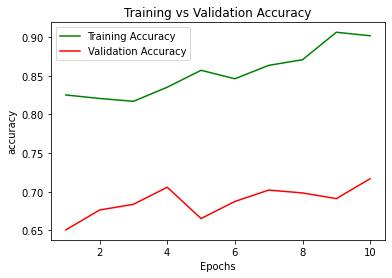

In [24]:
import matplotlib.pyplot as plt
acc_train = mdl.history['accuracy']
acc_val = mdl.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs,acc_train, 'g', label = 'Training Accuracy')
plt.plot(epochs,acc_val, 'r', label = 'Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

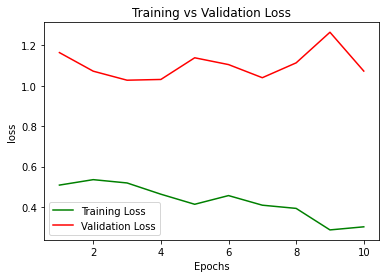

In [26]:
import matplotlib.pyplot as plt
loss_train = mdl.history['loss']
loss_val = mdl.history['val_loss']
epochs = range(1,11)
plt.plot(epochs,loss_train, 'g', label = 'Training Loss')
plt.plot(epochs,loss_val, 'r', label = 'Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# Testing

In [41]:
import numpy as np
import os
from PIL import Image
from tensorflow.keras.preprocessing import image

In [59]:
test_image = r'D:\Other files\projects\Monkey Breed Classification - DL\validation\validation\n2\n200.jpg'
display_image = Image.open(test_image)
test_image = image.load_img(test_image, target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
result

1/1 [==============================] - 0s 81ms/step


array([[7.94307953e-11, 1.08845315e-08, 9.99972343e-01, 2.76933843e-05,
        7.23583682e-09, 5.99775563e-10, 9.61443490e-13, 2.41492853e-10,
        1.33744971e-08, 5.97402173e-13]], dtype=float32)

In [77]:
result = np.argmax(result)

In [78]:
result

0

In [79]:
#we got the outcome. belongs to 2nd class. Now, we will use the text file to print out the full name of the monkey breed

Monkey Breed Predicted as per my model:  mantled_howler                


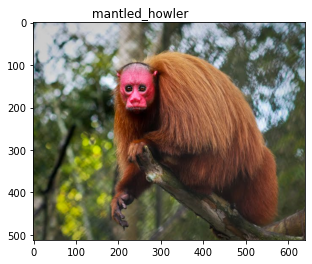

In [84]:
import pandas as pd
txt = pd.read_csv(r'D:\Other files\projects\Monkey Breed Classification - DL\monkey_labels.txt')
Name = txt.iloc[result]
Name = Name.iloc[2]
print("Monkey Breed Predicted as per my model: "+Name)
plt.imshow(display_image)
plt.title(Name)
plt.show()